# Import and load model

In [1]:
import sys
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from data_preparation import WindowFeatureExtractor

In [2]:
poses_sequence_path = '../../Data/Fall/Dataset_CAUCAFall/Poses_sequences/'
file_list = os.listdir(poses_sequence_path)
file_list = [poses_sequence_path + file_name for file_name in file_list]

In [3]:
window_size = 10
step_size = 5
window_feature_extractor = WindowFeatureExtractor(window_size=window_size, step_size=step_size)
# then we can create our training and test set, and make a grid search over the model parameters
X, y = window_feature_extractor.prepare_data(file_list)

In [4]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)
nan_index = np.where(y=='nan')[0]
X = X.drop(nan_index, axis=0)
y = np.delete(y, nan_index, axis=0)
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (3859, 136)
y shape:  (3859,)
X shape:  (3858, 136)
y shape:  (3858,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train

,X_nose_mean,X_nose_std,X_nose_min,X_nose_max,Y_nose_mean,Y_nose_std,Y_nose_min,Y_nose_max,X_left_eye_mean,X_left_eye_std,...,Y_left_ankle_min,Y_left_ankle_max,X_right_ankle_mean,X_right_ankle_std,X_right_ankle_min,X_right_ankle_max,Y_right_ankle_mean,Y_right_ankle_std,Y_right_ankle_min,Y_right_ankle_max
2463,265.882594,5.077179,259.647190,273.375912,245.112982,2.953655,240.141490,250.677685,274.120388,6.216879,...,319.246897,322.546883,319.048613,28.254774,285.194084,341.737665,319.488969,2.065148,317.338556,323.369821
798,442.288264,1.511970,439.799766,445.446533,268.499913,1.938272,265.026580,270.998848,445.029476,1.154548,...,342.356908,344.667841,267.215973,0.659787,266.300618,268.283881,309.127523,0.538134,308.287611,309.984369
3430,203.813928,5.875530,195.414391,213.106307,136.305148,4.379764,131.248095,143.515792,203.817102,5.831910,...,271.870561,305.820479,270.250692,0.662268,269.222686,270.956857,287.624474,0.929578,286.832943,289.672159
2338,248.791216,2.632082,246.218394,253.461107,246.295754,9.178849,235.481787,265.379076,253.904256,2.898881,...,306.966161,324.800666,335.456289,1.846960,332.987473,338.608262,312.058963,2.107746,309.675951,315.620970
2266,238.027008,7.630311,226.691402,252.906561,318.140379,9.332981,306.617153,334.054699,239.740227,5.500763,...,319.289074,326.101398,298.913446,26.469269,271.000078,325.218403,324.416754,2.670833,320.494129,328.152180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,487.430884,2.124404,484.248919,489.632826,291.887222,2.877877,287.839821,294.847498,487.350806,1.618530,...,265.974466,273.211073,330.890490,2.678299,326.543000,334.564284,298.936378,0.730843,297.401701,300.037277
1294,464.091850,9.506798,447.676090,475.400798,79.166910,2.075108,77.462682,82.805443,469.935845,9.779411,...,284.272359,286.325097,459.695610,8.899427,450.975738,473.638561,285.684767,5.323710,276.806534,293.405179
860,413.010008,1.183682,410.687831,415.018899,229.167218,0.891958,227.884551,230.409038,415.410399,1.044926,...,324.695098,329.085839,263.163640,0.588291,262.328450,264.215620,302.370675,0.994471,301.093598,303.738089
3508,347.520075,3.716943,340.981765,352.205965,118.947352,4.468350,111.383724,123.595544,353.849177,3.461556,...,310.282781,314.655506,370.371884,8.459607,359.428461,380.581966,295.745227,7.664124,284.215668,307.773014


In [7]:
scaler = pickle.load(open('models/standardScaler_window_{}_step_{}.sav'.format(window_size, step_size), 'rb'))
random_forest = pickle.load(open('models/randomForest_window_{}_step_{}.sav'.format(window_size, step_size), 'rb'))
print(random_forest.classes_)
random_forest.class_weight

['Fall' 'Lying down' 'Normal']


{'Normal': 1, 'Fall': 5, 'Lying down': 3}

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Perform evaluation and confusion matrix

In [9]:
y_pred = random_forest.predict(X_test_scaled)
print("Test score:", random_forest.score(X_test_scaled, y_test))
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Test score: 0.9702072538860104
Classification Report:
               precision    recall  f1-score   support

        Fall       0.95      0.75      0.84        75
  Lying down       0.97      0.99      0.98       204
      Normal       0.97      1.00      0.98       493

    accuracy                           0.97       772
   macro avg       0.96      0.91      0.93       772
weighted avg       0.97      0.97      0.97       772



In [10]:
conf = confusion_matrix(y_test, y_pred)

['Fall' 'Lying down' 'Normal']


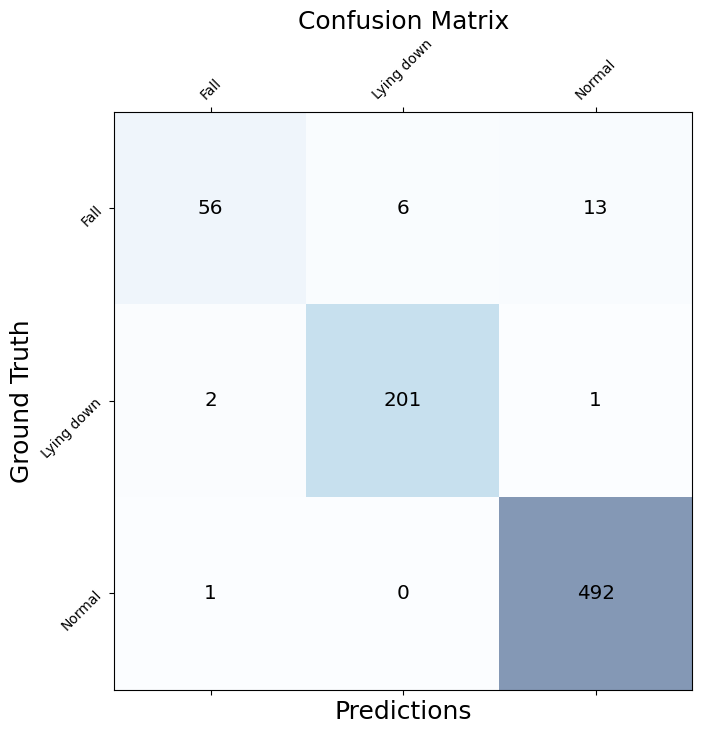

In [11]:
def plot_confusion_matrix(conf_matrix, labels):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
    
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels, rotation=45)

    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45)
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Ground Truth', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

labels = np.unique(y_test)
print(labels)
plot_confusion_matrix(conf, labels)

## Plot features importance

In [12]:
features_name = scaler.feature_names_in_

In [13]:
features_importance_series = pd.Series(random_forest.feature_importances_, index=features_name)

In [14]:
features_importance_series.sort_values(ascending=False, inplace=True)
features_importance_series.head(10)

Y_right_ear_mean    0.030366
Y_right_ear_min     0.029432
Y_left_ear_min      0.027070
Y_right_ear_max     0.020185
Y_left_hip_std      0.019442
X_left_ear_std      0.019280
X_right_ear_std     0.018493
X_left_hip_std      0.016988
Y_right_ear_std     0.016947
Y_left_ear_max      0.016258
dtype: float64

<Axes: >

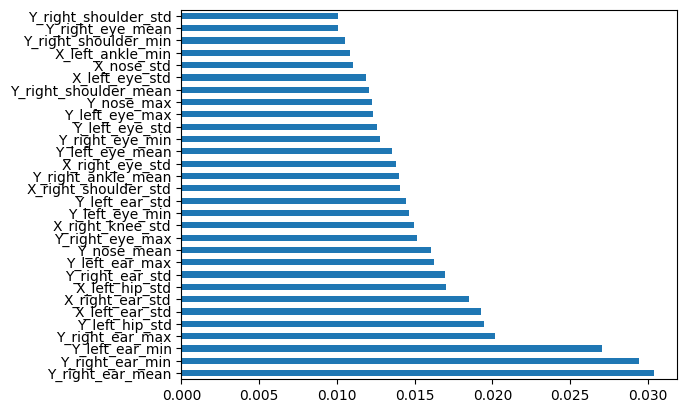

In [15]:
features_importance_series.head(30).plot.barh()